<a href="https://colab.research.google.com/github/Khushbushahh/Machine-Learning-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Necessary Modules**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
import collections
import plotly.graph_objects as go
from keras.layers import Dense, Input, Dropout
from keras.models import Model

template = "ggplot2"

### **Loading the Dataset**

In [ ]:
data = pd.read_csv('/BreastCancerMLFinalProject.csv',header=(0)) 
data = data.drop(['samples'], axis=1)
data

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,cancer_epithelial,6.421287,3.161197,1.965993,2.600064,2.157899,3.153408,2.012364,1.976855,1.609713,...,12.005226,12.476655,14.271008,13.855944,2.076140,1.875804,1.922314,2.050677,1.938257,1.737185
1,cancer_epithelial,6.715620,3.131431,2.624435,3.340376,2.214897,2.998384,2.377003,2.219821,1.667293,...,12.929805,12.694136,14.369922,14.290305,2.417179,1.884293,1.914287,2.037783,2.118252,1.917345
2,cancer_epithelial,7.019017,3.080859,2.977302,2.692181,2.023505,3.547079,2.354219,2.319934,2.793515,...,12.604099,12.620167,14.420994,14.285785,2.032913,1.903823,1.894262,1.866963,2.047231,1.954799
3,cancer_epithelial,7.595891,2.863032,2.499157,3.004193,2.033855,3.405192,2.346281,2.261241,1.931241,...,13.134787,13.002423,14.426406,14.303121,2.105099,1.922194,1.904258,1.902839,2.051988,1.995356
4,cancer_epithelial,7.312846,2.498788,2.064275,3.180191,2.011954,2.919717,2.099707,2.058700,1.742419,...,11.984974,11.990301,14.251174,14.217504,2.247308,2.275464,2.097682,2.064976,2.049793,2.060105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,normal,4.964542,3.476845,2.474469,3.098760,2.258731,3.984731,2.251656,2.858815,1.935321,...,12.833672,12.784808,14.308948,14.214347,2.360403,2.139383,2.138510,2.281116,2.392858,2.056008
62,normal,6.615542,3.172862,2.046898,2.910506,1.898154,3.989879,2.529319,2.126363,3.010383,...,12.310513,12.399476,14.344093,14.266681,2.083333,1.862586,1.948317,1.951384,2.135880,1.884259
63,normal,4.266514,2.569539,2.740029,4.728759,2.628050,4.624100,2.861033,2.946826,1.699775,...,13.167067,13.022775,14.430827,14.278016,2.377149,2.080764,2.340804,2.042263,2.621448,2.232329
64,normal,6.510928,2.686223,2.335791,2.595520,2.207381,4.471173,2.332238,2.234381,2.217625,...,12.645530,12.362613,14.365992,14.299757,2.260901,1.884136,1.862255,1.965258,2.093662,2.022433


### **Organzing the Relevant Data into 3 Classes**

In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
y

classes = np.unique(y)
classes

array(['cancer_epithelial', 'cancer_stroma', 'normal'], dtype=object)

### **Creating a PCA Plot**

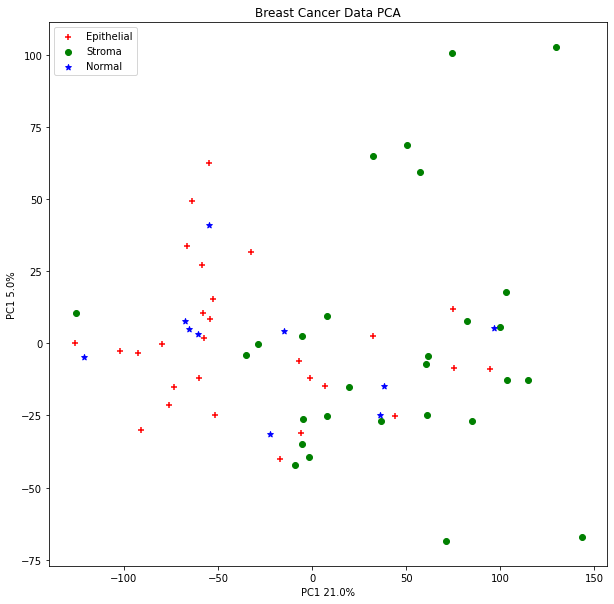

In [ ]:
scaled = StandardScaler()
scaled.fit(X)
scaled_data = scaled.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)

PC1 = 0
PC2 = 1

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]):
  if 'cancer_epithelial' in y[i]:
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
  elif 'cancer_stroma' in y[i]:
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
  elif 'normal' in y[i]:
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')  

plt.legend([c1, c2, c3],['Epithelial', 'Stroma', 'Normal'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%')
plt.ylabel(f'PC1 {round(pca.explained_variance_ratio_[1],2)*100}%')
plt.title('Breast Cancer Data PCA')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.70, stratify=y)

display("Train data", collections.Counter(y_train))
display("Test data", collections.Counter(y_test))

'Train data'

Counter({'cancer_epithelial': 8, 'cancer_stroma': 8, 'normal': 3})

'Test data'

Counter({'cancer_stroma': 20, 'cancer_epithelial': 20, 'normal': 7})

### **Creating a Lazy Predict Model**

In [ ]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

     |████████████████████████████████| 24.9 MB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [ ]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor
test_size = 0.50

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [00:46<00:00,  1.62s/it]


In [ ]:
#visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

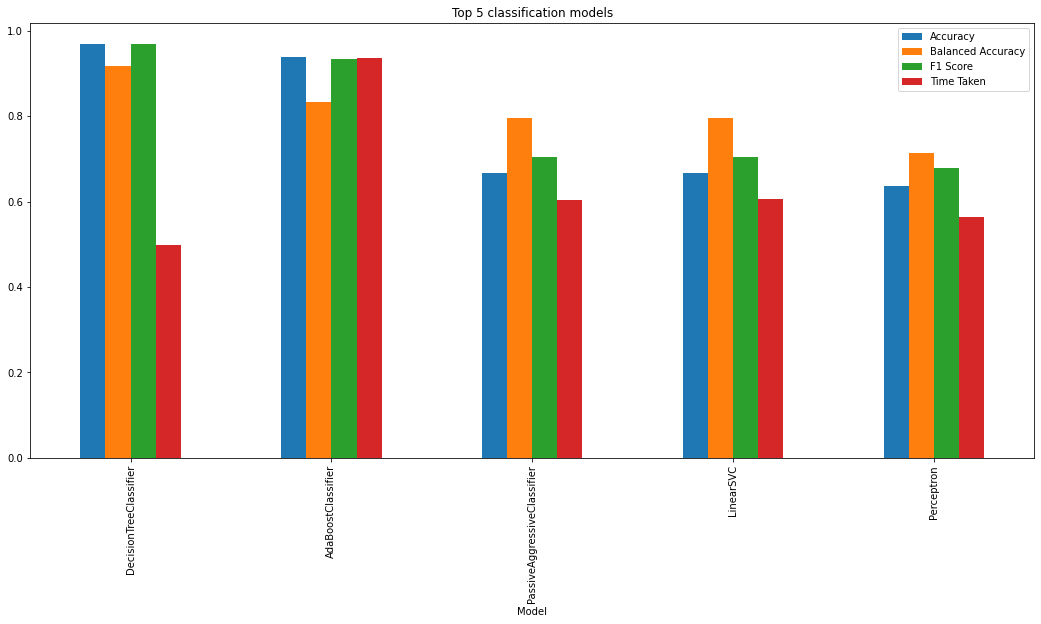

In [ ]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

### **Working with AutoEncoders**

In [ ]:
def train_auto_test(activation_type, encoding_dim):

  ncol = X_train.shape[1]
  input_dim = Input(shape = (ncol, ))

  # Encoder Layers
  encoded = Dense(500, activation = activation_type)(input_dim)
  encoded = Dropout(0.5)(encoded) #DROUPOUT
  encoded = Dense(100, activation = activation_type)(encoded)
  encoded = Dense(50, activation = activation_type)(encoded)

  encoded = Dense(encoding_dim, activation = activation_type)(encoded) # BOTTLENECK LAYER

  # Decoder Layers
  decoded = Dense(500, activation = activation_type)(encoded)
  decoded = Dense(100, activation = activation_type)(decoded)
  decoded = Dense(50, activation = activation_type)(decoded)
  decoded = Dense(ncol, activation = activation_type)(decoded)

  # Combine Encoder and Deocder layers
  autoencoder = Model(inputs = input_dim, outputs = decoded)

  # Compile the Model
  autoencoder.compile(optimizer = "Adam", loss = 'binary_crossentropy', metrics=['mae'])
  autoencoder.fit(X_train, X_train, epochs = 100,verbose=0, batch_size = 50, shuffle = True, validation_data = (X_test, X_test))
  encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
  encoded_input = Input(shape = (encoding_dim, ))

  #print(history.history.keys())
  # summarize history for accuracy
  plt.plot(autoencoder.history.history['mae'])
  plt.plot(autoencoder.history.history['val_mae'])
  plt.title('Mean Absolute Error')
  plt.ylabel('MAE')
  plt.xlabel('epoch cycles')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Prediction
  encoded_train = pd.DataFrame(encoder.predict(X_train))
  encoded_train = encoded_train.add_prefix('feature_')
  encoded_test = pd.DataFrame(encoder.predict(X_test))
  encoded_test = encoded_test.add_prefix('feature_')

  encoded_train['id'] = y_train
  encoded_train = encoded_train.set_index('id')

  encoded_test['id'] = y_test
  encoded_test = encoded_test.set_index('id')

  X_encoded = pd.concat([encoded_train,encoded_test])

  #PCA
  pca = PCA(n_components=0.80)
  projected = pca.fit_transform(X_encoded.iloc[:, 1:])
  y = list(X_encoded.index)
  le = preprocessing.LabelEncoder()
  le.fit(classes)
  y_encod = le.transform(y)

  plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
  plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
  plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
  #plt.colorbar();
  cb = plt.colorbar(ticks=range(4), label='Tumor Type')
  cb.ax.set_yticklabels(classes)
  plt.show()

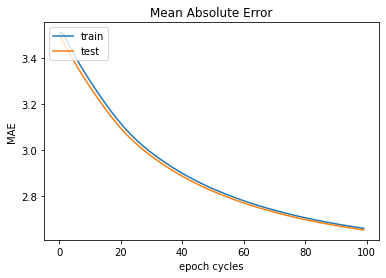

1/1 [==============================] - 0s 30ms/step


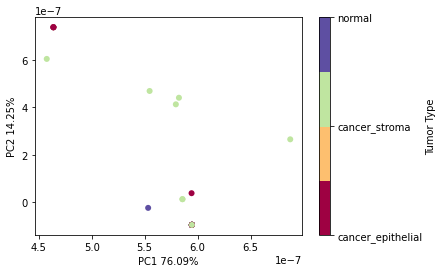

In [ ]:
train_auto_test('tanh', 100)

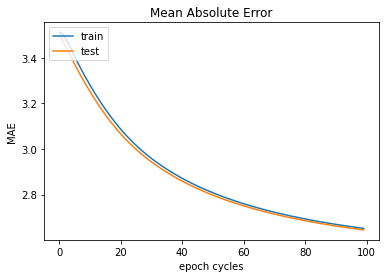

1/1 [==============================] - 0s 61ms/step


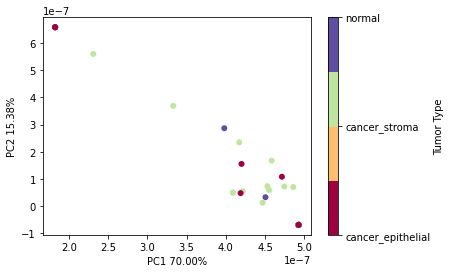

In [ ]:
train_auto_test('tanh', 50)

### **Creating a Random Forest Model**

In [ ]:
model = RandomForestClassifier(n_estimators=500, bootstrap=True)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

model_accuracy

0.45454545454545453

In [ ]:
heat = go.Heatmap(z = c_matrix, x=CM_df.index,
                   y=CM_df.columns,
                   showscale = False,
                   text=CM_df,
                   texttemplate="%{text}",
                   textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

### Decision Tree Classifier

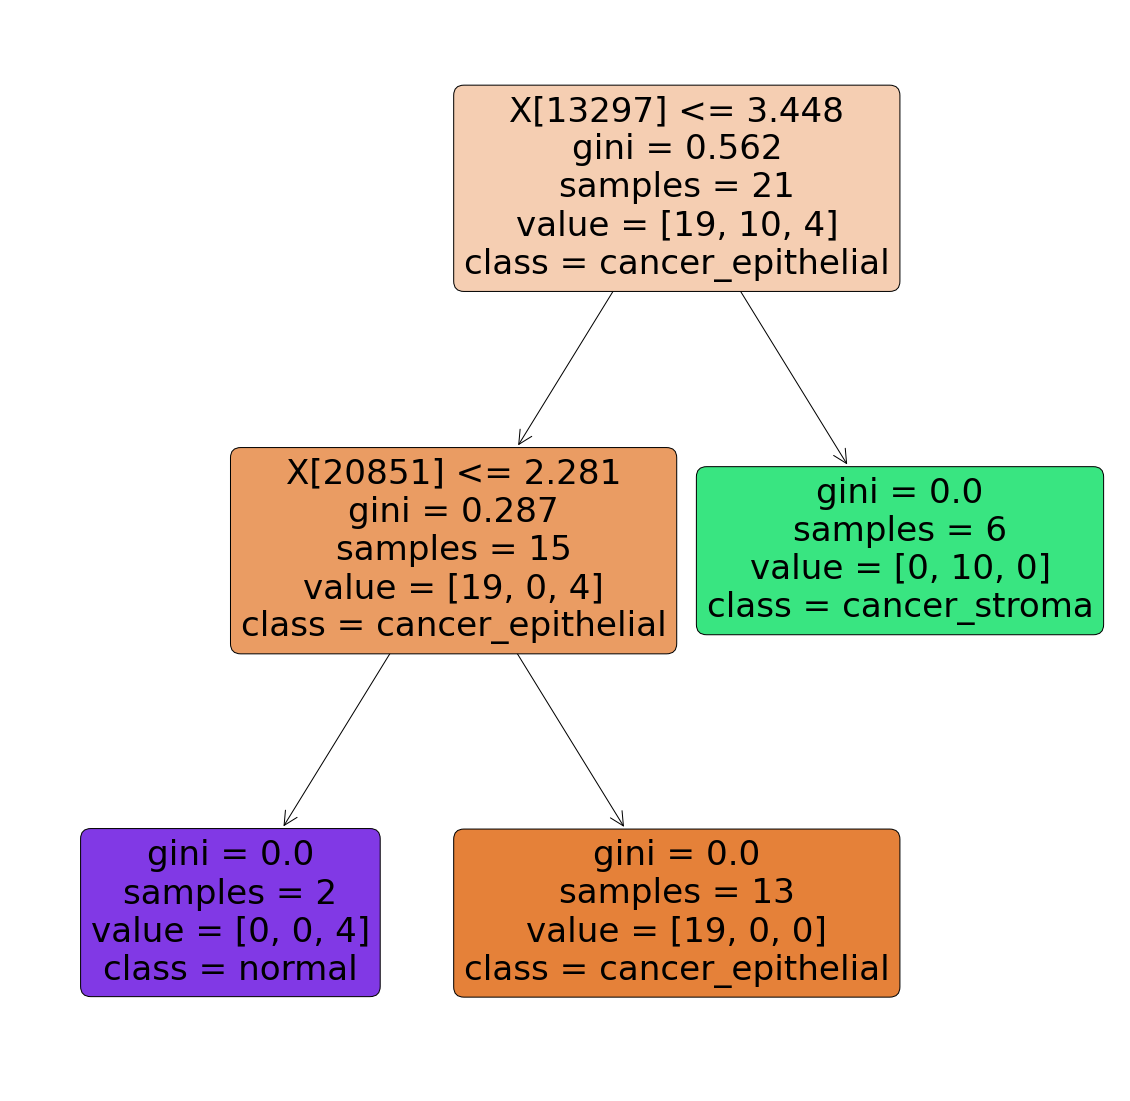

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

#plot the decision tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], 
                   filled=True, rounded=True, 
                   class_names=classes)

### **Reorganizing the Data into 2 groups: Cancer vs Normal**

In [ ]:
values = data["type"]
values = values.replace("cancer_epithelial", "cancer")
values = values.replace("cancer_stroma", "cancer")
data["type"] = values

In [ ]:
data

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,cancer,6.42,3.16,1.97,2.60,2.16,3.15,2.01,1.98,1.61,...,12.01,12.48,14.27,13.86,2.08,1.88,1.92,2.05,1.94,1.74
1,cancer,6.72,3.13,2.62,3.34,2.21,3.00,2.38,2.22,1.67,...,12.93,12.69,14.37,14.29,2.42,1.88,1.91,2.04,2.12,1.92
2,cancer,7.02,3.08,2.98,2.69,2.02,3.55,2.35,2.32,2.79,...,12.60,12.62,14.42,14.29,2.03,1.90,1.89,1.87,2.05,1.95
3,cancer,7.60,2.86,2.50,3.00,2.03,3.41,2.35,2.26,1.93,...,13.13,13.00,14.43,14.30,2.11,1.92,1.90,1.90,2.05,2.00
4,cancer,7.31,2.50,2.06,3.18,2.01,2.92,2.10,2.06,1.74,...,11.98,11.99,14.25,14.22,2.25,2.28,2.10,2.06,2.05,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,normal,4.96,3.48,2.47,3.10,2.26,3.98,2.25,2.86,1.94,...,12.83,12.78,14.31,14.21,2.36,2.14,2.14,2.28,2.39,2.06
62,normal,6.62,3.17,2.05,2.91,1.90,3.99,2.53,2.13,3.01,...,12.31,12.40,14.34,14.27,2.08,1.86,1.95,1.95,2.14,1.88
63,normal,4.27,2.57,2.74,4.73,2.63,4.62,2.86,2.95,1.70,...,13.17,13.02,14.43,14.28,2.38,2.08,2.34,2.04,2.62,2.23
64,normal,6.51,2.69,2.34,2.60,2.21,4.47,2.33,2.23,2.22,...,12.65,12.36,14.37,14.30,2.26,1.88,1.86,1.97,2.09,2.02


In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
y

classes = np.unique(y)
classes

array(['cancer', 'normal'], dtype=object)

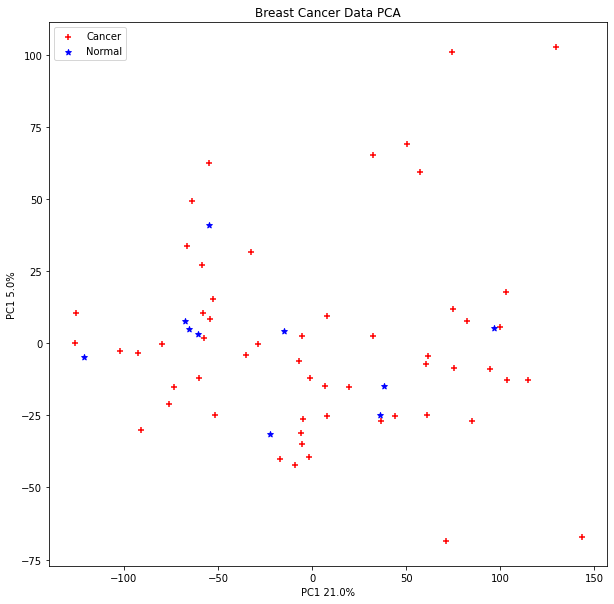

In [ ]:
scaled = StandardScaler()
scaled.fit(X)
scaled_data = scaled.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)

PC1 = 0
PC2 = 1

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]):
  if 'cancer' in y[i]:
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
  elif 'normal' in y[i]:
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')  

plt.legend([c1, c2],['Cancer','Normal'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%')
plt.ylabel(f'PC1 {round(pca.explained_variance_ratio_[1],2)*100}%')
plt.title('Breast Cancer Data PCA')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.50, stratify=y)

display("Train data", collections.Counter(y_train))
display("Test data", collections.Counter(y_test))

'Train data'

Counter({'cancer': 28, 'normal': 5})

'Test data'

Counter({'cancer': 28, 'normal': 5})

In [ ]:
model = RandomForestClassifier(n_estimators=500, bootstrap=False)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

model_accuracy

0.9393939393939394

In [ ]:
heat = go.Heatmap(z = c_matrix, x=CM_df.index,
                   y=CM_df.columns,
                   showscale = False,
                   text=CM_df,
                   texttemplate="%{text}",
                   textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

### **Feature Significance**

In [ ]:
data_plain = data.drop(columns=['type'])

features = data_plain.columns.values
features

array(['1007_s_at', '1053_at', '117_at', ..., 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'], dtype=object)

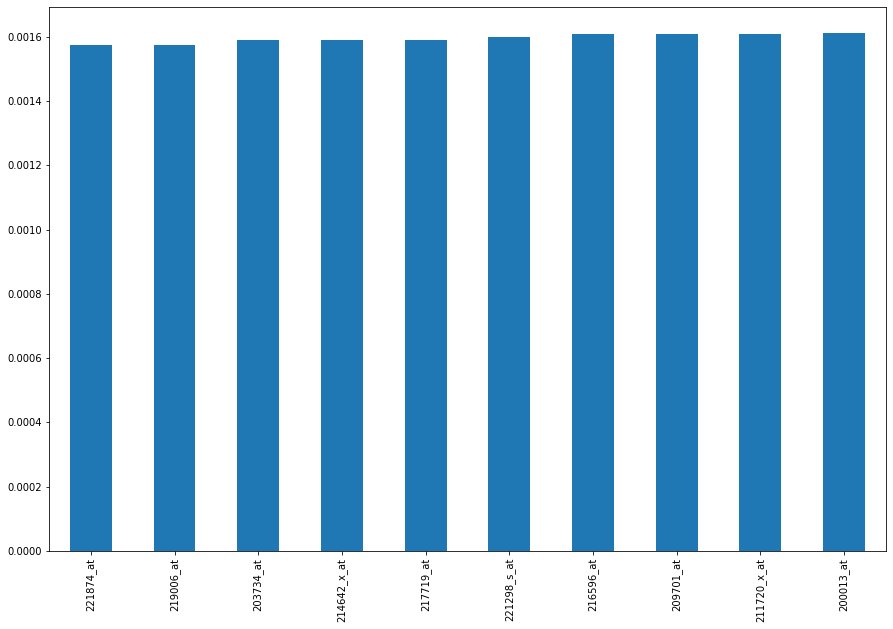

In [ ]:
data_plain = data.drop(columns=['type'])

features = data_plain.columns.values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)
forest_importances = forest_importances[forest_importances > 0.0015]
forest_importances = forest_importances.sort_values()

#plot forest_importances
forest_importances[0:10].plot.bar(figsize=(15, 10));